In [31]:
import os
from google.colab import userdata

In [32]:
!nvidia-smi

Tue May 13 01:56:30 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P0             53W /  400W |    1205MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [33]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [34]:
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git roboflow supervision flash-attn ultralytics

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [35]:

from roboflow import Roboflow
rf = Roboflow(api_key="Ym1IvaJmMhRLF9KtY6gK")
project = rf.workspace("navigationofindoor").project("indoor-map")
version = project.version(22)
dataset = version.download("yolov12")

loading Roboflow workspace...
loading Roboflow project...


In [36]:
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [37]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [38]:
!cat {dataset.location}/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 2
names: ['classroom', 'door']

roboflow:
test: ../test/images
train: ../train/images
val: ../valid/images


In [39]:
from ultralytics import YOLO

model = YOLO('yolov12s.yaml')

results = model.train(data=f'{dataset.location}/data.yaml', epochs=200)

New https://pypi.org/project/ultralytics/8.3.133 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolov12s.yaml, data=/content/Indoor-map-22/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None,

train: Scanning /content/Indoor-map-22/train/labels.cache... 261 images, 0 backgrounds, 0 corrupt: 100%|██████████| 261/261 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/Indoor-map-22/train/images/ENG_Floor3_3_JPG.rf.de1a514a4f288e3882e7fb2827623c34.jpg: 1 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 8927, len(boxes) = 19623. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Indoor-map-22/valid/labels.cache... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/Indoor-map-22/valid/images/ENG_Floor1_1_jpeg.rf.5f6a35dec0761ed57758829fd2d3c074.jpg: 1 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1179, len(boxes) = 1446. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 121 weight(decay=0.0), 128 weight(decay=0.0005), 127 bias(decay=0.0)
TensorBoard: WARNING ⚠️ TensorBoard graph visualization failure Tracing failed sanity checks!
ERROR: Graphs differed across invocations!
	Graph diff:
		  graph(%self.1 : __torch__.ultralytics.nn.tasks.DetectionModel,
		        %x.1 : Tensor):
		    %model : __torch__.torch.nn.modules.container.Sequential = prim::GetAttr[name="model"](%self.1)
		    %_21 : __torch__.ultralytics.nn.modules.head.Detect = prim::GetAttr[name="21"](%model)
		    %model.43 : __torch__.torch.nn.modules.container.Sequential = prim::GetAttr[name="model"](%self.1)
		    %_20 : __torch__.ultralytics.nn.modules.block.C3k2 = prim::GetAttr[name="20"](%model.43)
		    %model.41 : __torch

      1/200      10.6G      3.843      3.805       4.23        230        640: 100%|██████████| 17/17 [00:04<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]

                   all         14       1446      0.103      0.282      0.074     0.0397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      11.1G      3.692       3.61      4.076        470        640: 100%|██████████| 17/17 [00:02<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]

                   all         14       1446      0.105      0.282     0.0804     0.0417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      9.93G      3.571      3.156      3.835        346        640: 100%|██████████| 17/17 [00:03<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]

                   all         14       1446     0.0987      0.263     0.0755     0.0393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      7.63G      3.282      2.809      3.581        769        640: 100%|██████████| 17/17 [00:02<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]

                   all         14       1446     0.0982      0.264     0.0823     0.0359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      9.16G      3.008      2.688      3.304        551        640: 100%|██████████| 17/17 [00:02<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]

                   all         14       1446     0.0894       0.26     0.0622     0.0221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200       8.7G      2.874      2.598      3.083        901        640: 100%|██████████| 17/17 [00:02<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.50it/s]

                   all         14       1446      0.119      0.261      0.094     0.0386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      8.72G      2.794      2.479       2.88       1001        640: 100%|██████████| 17/17 [00:02<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.46it/s]

                   all         14       1446      0.104      0.269      0.102      0.038



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      8.86G      2.685      2.355      2.779        520        640: 100%|██████████| 17/17 [00:02<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]

                   all         14       1446      0.549      0.137     0.0684      0.021



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      8.19G      2.569      2.307      2.635        648        640: 100%|██████████| 17/17 [00:02<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]

                   all         14       1446     0.0508      0.176     0.0942     0.0356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      10.1G      2.407      2.189       2.52        712        640: 100%|██████████| 17/17 [00:02<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all         14       1446     0.0378     0.0439     0.0214    0.00918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      9.54G       2.33      2.128      2.432        565        640: 100%|██████████| 17/17 [00:02<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]


                   all         14       1446      0.587     0.0364       0.15     0.0359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      10.1G      2.267      2.018      2.297        514        640: 100%|██████████| 17/17 [00:02<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         14       1446     0.0895     0.0535     0.0256     0.0113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      8.54G      2.217      2.029      2.318        535        640: 100%|██████████| 17/17 [00:02<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]

                   all         14       1446      0.143      0.183     0.0969     0.0391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      7.26G      2.065      1.839      2.117        235        640: 100%|██████████| 17/17 [00:02<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]

                   all         14       1446     0.0722     0.0337     0.0203    0.00932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      7.41G      2.089      1.881      2.115        691        640: 100%|██████████| 17/17 [00:02<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]

                   all         14       1446      0.578     0.0444     0.0273     0.0127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      8.04G      2.038      1.857      2.085        544        640: 100%|██████████| 17/17 [00:02<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]


                   all         14       1446     0.0535      0.126      0.041     0.0231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      11.5G      2.008      1.868      2.067        671        640: 100%|██████████| 17/17 [00:02<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]

                   all         14       1446      0.103      0.183     0.0757     0.0297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      10.1G      1.962      1.827      2.032        403        640: 100%|██████████| 17/17 [00:02<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]

                   all         14       1446      0.591     0.0599     0.0397     0.0185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      7.98G       1.85      1.688      1.932        629        640: 100%|██████████| 17/17 [00:02<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


                   all         14       1446     0.0408      0.178     0.0526     0.0219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      8.61G      1.822      1.674      1.889        478        640: 100%|██████████| 17/17 [00:02<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]


                   all         14       1446     0.0861      0.046     0.0264     0.0128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      8.86G       1.81      1.729      1.935        572        640: 100%|██████████| 17/17 [00:02<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]

                   all         14       1446      0.608     0.0615     0.0606     0.0243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      9.46G      1.759      1.643      1.859        704        640: 100%|██████████| 17/17 [00:02<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]

                   all         14       1446     0.0851     0.0492     0.0272      0.014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200       7.4G      1.762      1.687       1.87        388        640: 100%|██████████| 17/17 [00:02<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         14       1446     0.0415      0.176     0.0484     0.0234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      8.78G      1.786      1.715        1.9        343        640: 100%|██████████| 17/17 [00:02<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]

                   all         14       1446     0.0222     0.0995     0.0184    0.00655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      8.45G       1.75      1.657      1.839        600        640: 100%|██████████| 17/17 [00:02<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]

                   all         14       1446     0.0769      0.209     0.0701     0.0355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      11.4G        1.7      1.568       1.73        665        640: 100%|██████████| 17/17 [00:02<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]

                   all         14       1446      0.553      0.198     0.0818      0.036



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      9.86G       1.69      1.646      1.809        711        640: 100%|██████████| 17/17 [00:02<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]


                   all         14       1446      0.567      0.141     0.0662     0.0263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      9.63G      1.652      1.607      1.763        229        640: 100%|██████████| 17/17 [00:02<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]


                   all         14       1446     0.0926       0.22     0.0742     0.0353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      9.26G      1.631      1.611      1.777        874        640: 100%|██████████| 17/17 [00:02<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]


                   all         14       1446     0.0851      0.162      0.061     0.0313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      9.05G       1.66      1.576      1.737        431        640: 100%|██████████| 17/17 [00:02<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all         14       1446       0.13       0.25      0.105     0.0486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      7.71G       1.62      1.523      1.712        390        640: 100%|██████████| 17/17 [00:02<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]

                   all         14       1446     0.0921      0.216     0.0758     0.0354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      10.5G      1.563      1.477      1.656        569        640: 100%|██████████| 17/17 [00:02<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]


                   all         14       1446      0.552      0.142     0.0427     0.0215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      8.53G      1.594      1.548        1.7        630        640: 100%|██████████| 17/17 [00:02<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]

                   all         14       1446     0.0863      0.182     0.0973      0.046



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      8.89G      1.578       1.55       1.69        382        640: 100%|██████████| 17/17 [00:02<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


                   all         14       1446      0.559      0.154     0.0453     0.0243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      9.86G      1.609       1.59      1.724        386        640: 100%|██████████| 17/17 [00:02<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]


                   all         14       1446      0.547      0.173     0.0916     0.0458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      8.99G      1.565      1.539      1.685        472        640: 100%|██████████| 17/17 [00:02<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]

                   all         14       1446     0.0975      0.224     0.0765     0.0367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      7.61G      1.584      1.529      1.699        771        640: 100%|██████████| 17/17 [00:02<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]

                   all         14       1446     0.0864       0.23      0.072     0.0342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      7.81G      1.552      1.461       1.59        607        640: 100%|██████████| 17/17 [00:02<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]

                   all         14       1446      0.601      0.066     0.0513     0.0251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      8.75G       1.49      1.457      1.599        282        640: 100%|██████████| 17/17 [00:02<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         14       1446       0.13      0.269      0.107     0.0518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      8.47G      1.518      1.533      1.677        524        640: 100%|██████████| 17/17 [00:02<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]


                   all         14       1446      0.584      0.194     0.0816     0.0357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      9.42G      1.542      1.498      1.657       1178        640: 100%|██████████| 17/17 [00:02<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all         14       1446      0.142      0.218     0.0744     0.0374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      10.3G      1.522      1.508      1.657        952        640: 100%|██████████| 17/17 [00:02<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                   all         14       1446     0.0973      0.265     0.0948     0.0433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      8.15G      1.473      1.527      1.672        880        640: 100%|██████████| 17/17 [00:02<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]

                   all         14       1446     0.0921      0.218     0.0745     0.0366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      8.13G      1.434      1.435      1.575        357        640: 100%|██████████| 17/17 [00:02<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all         14       1446      0.106      0.245     0.0848     0.0431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      8.04G      1.481      1.464      1.598        596        640: 100%|██████████| 17/17 [00:02<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all         14       1446       0.13       0.25      0.102     0.0487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      9.21G      1.458      1.482       1.61        328        640: 100%|██████████| 17/17 [00:02<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.91it/s]

                   all         14       1446      0.128      0.267      0.119      0.058



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      7.71G      1.423      1.479      1.605        903        640: 100%|██████████| 17/17 [00:02<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]

                   all         14       1446      0.147      0.224      0.113     0.0594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      8.72G      1.425      1.491      1.593        818        640: 100%|██████████| 17/17 [00:02<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all         14       1446      0.119      0.281        0.1     0.0494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      7.76G      1.406      1.399      1.545        615        640: 100%|██████████| 17/17 [00:02<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                   all         14       1446      0.106      0.279     0.0919     0.0424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      8.15G       1.43        1.4      1.542       1055        640: 100%|██████████| 17/17 [00:02<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]

                   all         14       1446     0.0811      0.226     0.0696     0.0352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      7.73G      1.402       1.43      1.559        411        640: 100%|██████████| 17/17 [00:02<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]

                   all         14       1446      0.102      0.225     0.0858     0.0434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      6.89G      1.411       1.36       1.49        381        640: 100%|██████████| 17/17 [00:02<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all         14       1446      0.104      0.234     0.0925     0.0466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      9.15G      1.402      1.487      1.585        273        640: 100%|██████████| 17/17 [00:02<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]

                   all         14       1446      0.596     0.0813     0.0478     0.0272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      8.35G      1.411      1.383      1.486        472        640: 100%|██████████| 17/17 [00:02<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all         14       1446      0.589     0.0588       0.03     0.0174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      10.4G      1.413      1.423      1.538        674        640: 100%|██████████| 17/17 [00:02<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all         14       1446     0.0929      0.248     0.0811     0.0409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      10.2G      1.365      1.415      1.511        609        640: 100%|██████████| 17/17 [00:02<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]


                   all         14       1446      0.557      0.159     0.0444     0.0241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      9.55G      1.415      1.493      1.556        618        640: 100%|██████████| 17/17 [00:02<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]

                   all         14       1446      0.106      0.242     0.0835      0.041



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      10.2G      1.359      1.413      1.496        337        640: 100%|██████████| 17/17 [00:02<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]

                   all         14       1446      0.129      0.293      0.108     0.0521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      8.49G      1.357      1.363      1.479        430        640: 100%|██████████| 17/17 [00:02<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]

                   all         14       1446      0.094      0.243     0.0794      0.038



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      8.34G      1.339      1.387       1.52        838        640: 100%|██████████| 17/17 [00:02<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]

                   all         14       1446      0.115      0.268     0.0968     0.0482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      10.9G      1.384      1.386      1.503        644        640: 100%|██████████| 17/17 [00:02<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]

                   all         14       1446      0.138      0.254      0.105     0.0559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      9.66G      1.336      1.372      1.473        327        640: 100%|██████████| 17/17 [00:02<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]

                   all         14       1446       0.14      0.261      0.117     0.0625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      9.89G      1.333      1.353      1.482        557        640: 100%|██████████| 17/17 [00:02<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]

                   all         14       1446      0.134      0.257      0.103     0.0499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      8.18G      1.353      1.365      1.487        658        640: 100%|██████████| 17/17 [00:02<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]

                   all         14       1446      0.583     0.0834     0.0577      0.028



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      8.99G      1.359      1.389       1.51        631        640: 100%|██████████| 17/17 [00:02<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.93it/s]

                   all         14       1446      0.134      0.267      0.109     0.0547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      9.31G      1.328      1.366      1.475        746        640: 100%|██████████| 17/17 [00:02<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]

                   all         14       1446     0.0964      0.189      0.068     0.0368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      10.5G      1.383      1.431      1.537       1003        640: 100%|██████████| 17/17 [00:02<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all         14       1446       0.11      0.231      0.089     0.0466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      9.05G      1.337      1.413      1.513        285        640: 100%|██████████| 17/17 [00:02<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all         14       1446     0.0962      0.225     0.0805     0.0406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200       9.4G      1.295      1.381      1.489        572        640: 100%|██████████| 17/17 [00:02<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]

                   all         14       1446     0.0812      0.225      0.072     0.0378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      8.49G      1.296      1.293      1.433        643        640: 100%|██████████| 17/17 [00:02<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]

                   all         14       1446      0.103      0.242     0.0842     0.0445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      9.48G      1.302      1.322      1.477        490        640: 100%|██████████| 17/17 [00:02<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]

                   all         14       1446      0.115      0.287      0.102     0.0534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      9.32G      1.315      1.342      1.448        455        640: 100%|██████████| 17/17 [00:02<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

                   all         14       1446     0.0921      0.217     0.0852     0.0447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      9.27G      1.353      1.377      1.476        619        640: 100%|██████████| 17/17 [00:02<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]

                   all         14       1446     0.0903      0.264      0.085     0.0449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      10.3G       1.33      1.357      1.448        330        640: 100%|██████████| 17/17 [00:02<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


                   all         14       1446      0.128      0.352      0.144      0.072

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      9.97G      1.324      1.362      1.459        406        640: 100%|██████████| 17/17 [00:02<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]

                   all         14       1446      0.108      0.257     0.0925     0.0496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      8.78G      1.321      1.359      1.454        471        640: 100%|██████████| 17/17 [00:02<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]


                   all         14       1446      0.106      0.286      0.106     0.0494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      8.77G      1.291      1.326      1.441        417        640: 100%|██████████| 17/17 [00:02<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all         14       1446     0.0877      0.258     0.0845     0.0461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      10.8G      1.296      1.356      1.454        609        640: 100%|██████████| 17/17 [00:02<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.12it/s]

                   all         14       1446     0.0799      0.236     0.0743     0.0407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      7.31G      1.278      1.318      1.413        785        640: 100%|██████████| 17/17 [00:02<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         14       1446     0.0828      0.237     0.0687     0.0368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      7.96G      1.297      1.299      1.408       1230        640: 100%|██████████| 17/17 [00:02<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all         14       1446     0.0863      0.259     0.0743     0.0394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      10.3G      1.298      1.335      1.449        528        640: 100%|██████████| 17/17 [00:02<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.83it/s]

                   all         14       1446     0.0781      0.248     0.0742     0.0399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      10.2G      1.296      1.363      1.475        720        640: 100%|██████████| 17/17 [00:02<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]

                   all         14       1446     0.0767      0.245     0.0738     0.0402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      8.51G      1.349      1.419      1.485        416        640: 100%|██████████| 17/17 [00:02<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]

                   all         14       1446      0.068      0.219     0.0614     0.0342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      9.07G      1.284      1.325      1.445        792        640: 100%|██████████| 17/17 [00:02<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]

                   all         14       1446     0.0912      0.276     0.0829     0.0438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      11.2G      1.323      1.376      1.471        559        640: 100%|██████████| 17/17 [00:02<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]

                   all         14       1446      0.118      0.228     0.0719     0.0359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      9.35G      1.301      1.366      1.434        792        640: 100%|██████████| 17/17 [00:02<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]

                   all         14       1446      0.131      0.189     0.0791     0.0428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      8.53G      1.301      1.354      1.454       1106        640: 100%|██████████| 17/17 [00:02<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]

                   all         14       1446      0.188      0.259      0.131     0.0658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      8.15G      1.307      1.394      1.474        333        640: 100%|██████████| 17/17 [00:02<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]

                   all         14       1446      0.216      0.276       0.13     0.0649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      8.28G      1.295      1.366      1.461        363        640: 100%|██████████| 17/17 [00:02<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]

                   all         14       1446      0.198      0.226      0.115     0.0537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      9.87G      1.283       1.36      1.454        768        640: 100%|██████████| 17/17 [00:02<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.73it/s]

                   all         14       1446      0.102      0.248     0.0847     0.0456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      8.64G      1.257        1.3      1.386        810        640: 100%|██████████| 17/17 [00:02<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]

                   all         14       1446     0.0766      0.225     0.0715       0.04



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      6.69G      1.293      1.289        1.4        462        640: 100%|██████████| 17/17 [00:02<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]

                   all         14       1446     0.0822      0.247     0.0775     0.0431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      7.91G      1.292      1.304      1.423        466        640: 100%|██████████| 17/17 [00:02<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]

                   all         14       1446      0.106      0.257      0.086      0.046



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      9.34G      1.266      1.378      1.432        680        640: 100%|██████████| 17/17 [00:02<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]

                   all         14       1446     0.0951      0.262      0.086      0.047



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      7.88G      1.286       1.38      1.473        518        640: 100%|██████████| 17/17 [00:02<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.37it/s]

                   all         14       1446      0.112      0.326      0.111     0.0584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      7.37G      1.285       1.34      1.454        551        640: 100%|██████████| 17/17 [00:02<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]

                   all         14       1446     0.0824      0.257     0.0753     0.0418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      8.19G      1.245      1.293      1.388        268        640: 100%|██████████| 17/17 [00:02<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]

                   all         14       1446      0.124      0.296      0.101     0.0501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      7.51G      1.295      1.324      1.444        494        640: 100%|██████████| 17/17 [00:02<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]

                   all         14       1446     0.0851      0.259     0.0809     0.0427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      8.04G      1.255      1.303      1.412        362        640: 100%|██████████| 17/17 [00:02<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         14       1446     0.0753      0.214     0.0666     0.0376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      10.5G      1.248      1.275      1.401        537        640: 100%|██████████| 17/17 [00:02<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]

                   all         14       1446      0.115      0.297        0.1     0.0504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      8.13G      1.263      1.306      1.407        466        640: 100%|██████████| 17/17 [00:02<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]

                   all         14       1446      0.116      0.262     0.0859     0.0463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      10.1G      1.263      1.373      1.453        850        640: 100%|██████████| 17/17 [00:02<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]

                   all         14       1446     0.0944      0.274     0.0865      0.047



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      8.81G      1.253      1.323      1.421        570        640: 100%|██████████| 17/17 [00:02<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all         14       1446      0.132      0.323      0.115     0.0635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      11.5G      1.232      1.295      1.378        274        640: 100%|██████████| 17/17 [00:02<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]

                   all         14       1446      0.119        0.3      0.107     0.0565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      9.11G      1.247      1.276      1.379        377        640: 100%|██████████| 17/17 [00:02<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]

                   all         14       1446      0.154       0.27     0.0967     0.0535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      7.33G      1.252      1.343       1.42       1149        640: 100%|██████████| 17/17 [00:02<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.84it/s]

                   all         14       1446      0.114       0.24     0.0827     0.0462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      11.1G      1.219      1.252      1.359        167        640: 100%|██████████| 17/17 [00:02<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.59it/s]

                   all         14       1446      0.108      0.245     0.0806     0.0432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      9.48G      1.247       1.33      1.413        472        640: 100%|██████████| 17/17 [00:02<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]

                   all         14       1446      0.142      0.304      0.111      0.056



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      8.98G       1.23      1.258      1.354        579        640: 100%|██████████| 17/17 [00:02<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.12it/s]

                   all         14       1446      0.152      0.277     0.0967     0.0518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200       8.5G      1.254      1.283      1.395       1015        640: 100%|██████████| 17/17 [00:02<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all         14       1446      0.165      0.251      0.106      0.055



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      7.68G      1.239      1.228      1.349        496        640: 100%|██████████| 17/17 [00:02<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

                   all         14       1446      0.136      0.196      0.082     0.0449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      8.49G      1.253      1.319      1.421        335        640: 100%|██████████| 17/17 [00:02<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]

                   all         14       1446      0.177       0.21      0.105     0.0543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      9.16G      1.261      1.317      1.405        553        640: 100%|██████████| 17/17 [00:02<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]

                   all         14       1446      0.194      0.235      0.108     0.0553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200         9G      1.234      1.308      1.408       1109        640: 100%|██████████| 17/17 [00:02<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]

                   all         14       1446      0.132      0.276      0.103     0.0541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      9.54G       1.21      1.244      1.355        441        640: 100%|██████████| 17/17 [00:02<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]


                   all         14       1446      0.214       0.33      0.151     0.0797

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      8.94G      1.223      1.249      1.379        547        640: 100%|██████████| 17/17 [00:02<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]

                   all         14       1446      0.157       0.28     0.0981     0.0524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      9.37G      1.242      1.282      1.382        831        640: 100%|██████████| 17/17 [00:02<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.57it/s]

                   all         14       1446      0.103      0.243     0.0781     0.0414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      8.37G      1.229      1.237      1.365        394        640: 100%|██████████| 17/17 [00:02<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]

                   all         14       1446      0.168      0.218      0.101     0.0538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      10.5G      1.227       1.33      1.411        461        640: 100%|██████████| 17/17 [00:02<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]

                   all         14       1446      0.224      0.287      0.132     0.0686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      7.86G       1.22      1.254      1.375        427        640: 100%|██████████| 17/17 [00:02<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]

                   all         14       1446       0.11      0.178     0.0696     0.0381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      8.48G      1.167      1.209      1.327        270        640: 100%|██████████| 17/17 [00:02<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]

                   all         14       1446      0.194      0.213      0.104     0.0534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      8.49G      1.209      1.259      1.366        420        640: 100%|██████████| 17/17 [00:02<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         14       1446      0.179      0.222      0.108     0.0582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      7.91G       1.26      1.319      1.423        328        640: 100%|██████████| 17/17 [00:02<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]

                   all         14       1446      0.201      0.279      0.132     0.0695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      8.26G      1.212      1.296      1.382        504        640: 100%|██████████| 17/17 [00:02<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]

                   all         14       1446        0.2      0.226      0.122     0.0662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      8.38G      1.219      1.262      1.359        971        640: 100%|██████████| 17/17 [00:02<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]

                   all         14       1446      0.132      0.206     0.0858     0.0438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      8.86G      1.219      1.278       1.39        446        640: 100%|██████████| 17/17 [00:02<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         14       1446      0.168      0.283      0.115     0.0581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200       8.3G      1.219      1.259       1.36        966        640: 100%|██████████| 17/17 [00:02<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]

                   all         14       1446      0.142      0.204     0.0897     0.0476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200        11G      1.235      1.301      1.419        690        640: 100%|██████████| 17/17 [00:02<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]

                   all         14       1446      0.205      0.238      0.112      0.055



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      9.58G       1.18      1.266      1.388        615        640: 100%|██████████| 17/17 [00:02<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all         14       1446       0.16      0.322      0.134     0.0703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      7.61G      1.198      1.286      1.411        666        640: 100%|██████████| 17/17 [00:02<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.41it/s]

                   all         14       1446      0.132      0.168     0.0841      0.047



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200       9.1G      1.182      1.228      1.354        471        640: 100%|██████████| 17/17 [00:02<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         14       1446      0.109      0.251     0.0915     0.0484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      7.79G      1.186      1.263      1.375        786        640: 100%|██████████| 17/17 [00:02<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]

                   all         14       1446      0.187      0.244      0.111      0.058



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      8.43G      1.193      1.243      1.381        605        640: 100%|██████████| 17/17 [00:02<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]

                   all         14       1446      0.205       0.23      0.114     0.0619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      8.34G      1.154      1.207       1.32        343        640: 100%|██████████| 17/17 [00:02<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.67it/s]

                   all         14       1446      0.176      0.168     0.0876     0.0487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      10.2G       1.18      1.215      1.344        675        640: 100%|██████████| 17/17 [00:02<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]

                   all         14       1446      0.159      0.216     0.0899     0.0493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      7.88G      1.195      1.227      1.357        548        640: 100%|██████████| 17/17 [00:02<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all         14       1446      0.166      0.202        0.1     0.0543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      8.91G      1.193      1.236      1.368        609        640: 100%|██████████| 17/17 [00:02<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.35it/s]

                   all         14       1446      0.186      0.216      0.106     0.0558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      8.86G      1.178       1.18      1.324        729        640: 100%|██████████| 17/17 [00:02<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.49it/s]

                   all         14       1446      0.182      0.235      0.106     0.0561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      8.49G        1.2      1.227      1.349        575        640: 100%|██████████| 17/17 [00:02<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.52it/s]

                   all         14       1446      0.179      0.243      0.102     0.0518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      8.99G      1.202      1.233      1.354        504        640: 100%|██████████| 17/17 [00:02<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.12it/s]

                   all         14       1446      0.154       0.28        0.1     0.0536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      7.77G      1.183      1.233      1.335        540        640: 100%|██████████| 17/17 [00:02<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.49it/s]

                   all         14       1446      0.139       0.22     0.0844     0.0457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      8.29G      1.183       1.25      1.364        769        640: 100%|██████████| 17/17 [00:02<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.84it/s]

                   all         14       1446      0.189      0.298      0.128     0.0632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      7.25G      1.173       1.24       1.35        375        640: 100%|██████████| 17/17 [00:02<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         14       1446      0.146      0.357      0.134     0.0716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      8.66G      1.142      1.224      1.345        407        640: 100%|██████████| 17/17 [00:02<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]

                   all         14       1446      0.164      0.224     0.0965     0.0495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      11.2G      1.193      1.284      1.388        343        640: 100%|██████████| 17/17 [00:02<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.48it/s]

                   all         14       1446      0.125       0.32      0.111      0.059



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      9.93G      1.184      1.241      1.347        733        640: 100%|██████████| 17/17 [00:02<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.68it/s]

                   all         14       1446      0.206      0.269      0.131     0.0698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      9.37G      1.207      1.279      1.397        638        640: 100%|██████████| 17/17 [00:02<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.29it/s]

                   all         14       1446      0.169      0.189     0.0893     0.0472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      8.96G      1.174      1.243      1.374        760        640: 100%|██████████| 17/17 [00:02<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         14       1446      0.194      0.214     0.0984     0.0513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      8.64G      1.176      1.256      1.367        660        640: 100%|██████████| 17/17 [00:02<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.84it/s]

                   all         14       1446      0.149       0.29      0.114       0.06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      7.96G       1.19      1.305      1.394        575        640: 100%|██████████| 17/17 [00:02<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]

                   all         14       1446      0.178       0.25      0.112     0.0593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      9.86G      1.201      1.311      1.428        741        640: 100%|██████████| 17/17 [00:02<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]

                   all         14       1446      0.188      0.236      0.114     0.0607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      9.27G      1.195       1.29       1.41        724        640: 100%|██████████| 17/17 [00:02<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]

                   all         14       1446      0.196      0.234      0.118     0.0617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      7.23G      1.156      1.193      1.329        772        640: 100%|██████████| 17/17 [00:02<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.49it/s]

                   all         14       1446      0.133      0.219     0.0894     0.0485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      8.15G      1.177      1.263      1.352        773        640: 100%|██████████| 17/17 [00:02<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.72it/s]

                   all         14       1446      0.149      0.161     0.0827     0.0437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      7.92G      1.171      1.188      1.318        597        640: 100%|██████████| 17/17 [00:02<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]

                   all         14       1446      0.155      0.157     0.0831     0.0454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      8.73G      1.181      1.232      1.365        549        640: 100%|██████████| 17/17 [00:02<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all         14       1446      0.144      0.193     0.0879     0.0442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      7.86G      1.186      1.189      1.317        306        640: 100%|██████████| 17/17 [00:02<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]

                   all         14       1446      0.152      0.171     0.0834     0.0455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      6.81G      1.172      1.212      1.342        517        640: 100%|██████████| 17/17 [00:02<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.77it/s]

                   all         14       1446      0.158      0.158     0.0839     0.0458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      8.33G      1.158      1.219      1.353        414        640: 100%|██████████| 17/17 [00:02<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all         14       1446      0.152      0.174     0.0839     0.0465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      8.74G      1.166      1.207      1.356        475        640: 100%|██████████| 17/17 [00:02<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.54it/s]

                   all         14       1446      0.196      0.224       0.11      0.059



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200       7.7G      1.186      1.261      1.381        862        640: 100%|██████████| 17/17 [00:02<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.70it/s]

                   all         14       1446      0.179       0.19     0.0975     0.0505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200       9.1G      1.146      1.209      1.343        427        640: 100%|██████████| 17/17 [00:02<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]

                   all         14       1446      0.211      0.221      0.115     0.0637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      7.87G      1.161      1.209      1.357        718        640: 100%|██████████| 17/17 [00:02<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]

                   all         14       1446      0.269      0.234      0.144      0.072



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      8.11G      1.157      1.206      1.324        466        640: 100%|██████████| 17/17 [00:02<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.49it/s]

                   all         14       1446      0.143      0.165     0.0805     0.0444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      8.67G      1.157      1.211      1.351        702        640: 100%|██████████| 17/17 [00:02<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.35it/s]

                   all         14       1446      0.165      0.176     0.0904     0.0489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      9.65G      1.145      1.198      1.321        768        640: 100%|██████████| 17/17 [00:02<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]

                   all         14       1446      0.226       0.21      0.115     0.0592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      10.1G      1.185      1.251      1.397        931        640: 100%|██████████| 17/17 [00:02<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.67it/s]

                   all         14       1446      0.168      0.193     0.0908     0.0495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      10.9G      1.146      1.181       1.33        766        640: 100%|██████████| 17/17 [00:02<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]

                   all         14       1446      0.207      0.238      0.121     0.0662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200       8.1G      1.158      1.251      1.367        787        640: 100%|██████████| 17/17 [00:02<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]

                   all         14       1446        0.2      0.224      0.111     0.0596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      7.66G      1.138      1.188      1.315        180        640: 100%|██████████| 17/17 [00:02<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]

                   all         14       1446      0.211      0.221      0.112     0.0605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200       9.1G      1.124      1.184      1.299        517        640: 100%|██████████| 17/17 [00:02<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.77it/s]

                   all         14       1446       0.16      0.173     0.0874     0.0472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      8.16G      1.137      1.142      1.284        506        640: 100%|██████████| 17/17 [00:02<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.40it/s]

                   all         14       1446      0.159      0.144     0.0737     0.0405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      10.2G      1.147      1.202      1.354        600        640: 100%|██████████| 17/17 [00:02<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]

                   all         14       1446      0.139      0.157      0.073      0.039



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      8.24G       1.17      1.251      1.352        500        640: 100%|██████████| 17/17 [00:02<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]

                   all         14       1446      0.156      0.153     0.0726     0.0393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      8.55G      1.143      1.215      1.347        587        640: 100%|██████████| 17/17 [00:02<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]

                   all         14       1446      0.177      0.166     0.0853     0.0465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      9.51G      1.153      1.184      1.346        584        640: 100%|██████████| 17/17 [00:02<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.46it/s]

                   all         14       1446      0.209      0.195      0.104      0.055



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      7.95G      1.124      1.225      1.345        304        640: 100%|██████████| 17/17 [00:02<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.43it/s]

                   all         14       1446       0.16      0.206     0.0966     0.0519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200       7.7G      1.166      1.226      1.331        377        640: 100%|██████████| 17/17 [00:02<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]

                   all         14       1446      0.177      0.202     0.0977     0.0519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      8.57G       1.14      1.198      1.341        531        640: 100%|██████████| 17/17 [00:02<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]

                   all         14       1446      0.185      0.211      0.103     0.0547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      9.13G      1.117      1.186      1.339       1014        640: 100%|██████████| 17/17 [00:02<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]

                   all         14       1446      0.193      0.212      0.105     0.0567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      9.84G      1.113      1.177      1.308       1065        640: 100%|██████████| 17/17 [00:02<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         14       1446      0.158      0.177     0.0915     0.0505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      8.68G      1.159      1.202      1.331        791        640: 100%|██████████| 17/17 [00:02<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.88it/s]

                   all         14       1446      0.145      0.163     0.0827      0.046



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      8.23G      1.148      1.204      1.336        715        640: 100%|██████████| 17/17 [00:02<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.77it/s]

                   all         14       1446      0.149      0.163     0.0829     0.0434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      8.45G      1.135      1.144      1.278        781        640: 100%|██████████| 17/17 [00:02<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.71it/s]

                   all         14       1446      0.144      0.173     0.0813     0.0426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      9.55G      1.147      1.197      1.332        686        640: 100%|██████████| 17/17 [00:02<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         14       1446       0.15      0.165     0.0774     0.0425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      8.04G      1.155      1.234      1.346        445        640: 100%|██████████| 17/17 [00:02<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.94it/s]

                   all         14       1446      0.192      0.211      0.101     0.0562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      9.08G      1.136      1.185      1.343       1181        640: 100%|██████████| 17/17 [00:02<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]

                   all         14       1446      0.199      0.219      0.108     0.0603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      7.87G      1.135      1.187      1.313       1111        640: 100%|██████████| 17/17 [00:02<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.51it/s]

                   all         14       1446      0.174      0.204     0.0949     0.0539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      9.26G      1.125      1.168      1.321        688        640: 100%|██████████| 17/17 [00:02<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.74it/s]

                   all         14       1446      0.177      0.201     0.0945     0.0547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      10.4G      1.113      1.155      1.319        655        640: 100%|██████████| 17/17 [00:02<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]

                   all         14       1446      0.186      0.207      0.103      0.058


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200       7.2G      1.105      1.175      1.273        239        640: 100%|██████████| 17/17 [00:03<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all         14       1446      0.183      0.202      0.102     0.0583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      6.45G      1.085       1.16      1.256        423        640: 100%|██████████| 17/17 [00:02<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]

                   all         14       1446      0.161      0.178      0.091     0.0523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      5.97G      1.056      1.121      1.245        497        640: 100%|██████████| 17/17 [00:02<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.50it/s]

                   all         14       1446      0.163      0.184     0.0917     0.0518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200       7.2G      1.069      1.145      1.276        285        640: 100%|██████████| 17/17 [00:02<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all         14       1446      0.172       0.19     0.0951      0.053



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      6.53G      1.062      1.097      1.252        388        640: 100%|██████████| 17/17 [00:02<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.43it/s]

                   all         14       1446      0.176      0.206     0.0982      0.055



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      5.96G       1.08      1.154      1.285        274        640: 100%|██████████| 17/17 [00:02<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]

                   all         14       1446      0.167        0.2     0.0915     0.0516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      6.84G      1.072       1.13      1.264        418        640: 100%|██████████| 17/17 [00:02<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]

                   all         14       1446      0.159      0.196     0.0893     0.0499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      5.97G      1.069      1.092      1.258        332        640: 100%|██████████| 17/17 [00:02<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

                   all         14       1446      0.158      0.198     0.0899       0.05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      6.43G      1.067      1.103      1.271        508        640: 100%|██████████| 17/17 [00:02<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]

                   all         14       1446      0.156      0.192     0.0891     0.0496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      6.82G      1.076      1.114      1.268        418        640: 100%|██████████| 17/17 [00:02<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]

                   all         14       1446      0.163      0.191     0.0891     0.0495



200 epochs completed in 0.213 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 18.7MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 18.7MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv12s summary (fused): 376 layers, 9,074,982 parameters, 0 gradients, 19.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]


                   all         14       1446      0.213      0.329      0.151     0.0797
             classroom         14        935      0.183      0.475      0.175     0.0975
                  door         11        511      0.244      0.184      0.127      0.062
Speed: 0.2ms preprocess, 1.3ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train2


In [40]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/train/

args.yaml					   results.png
confusion_matrix_normalized.png			   train_batch0.jpg
confusion_matrix.png				   train_batch1.jpg
events.out.tfevents.1747100548.9e1299a94818.395.0  train_batch2.jpg
F1_curve.png					   train_batch3230.jpg
labels_correlogram.jpg				   train_batch3231.jpg
labels.jpg					   train_batch3232.jpg
P_curve.png					   val_batch0_labels.jpg
PR_curve.png					   val_batch0_pred.jpg
R_curve.png					   weights
results.csv


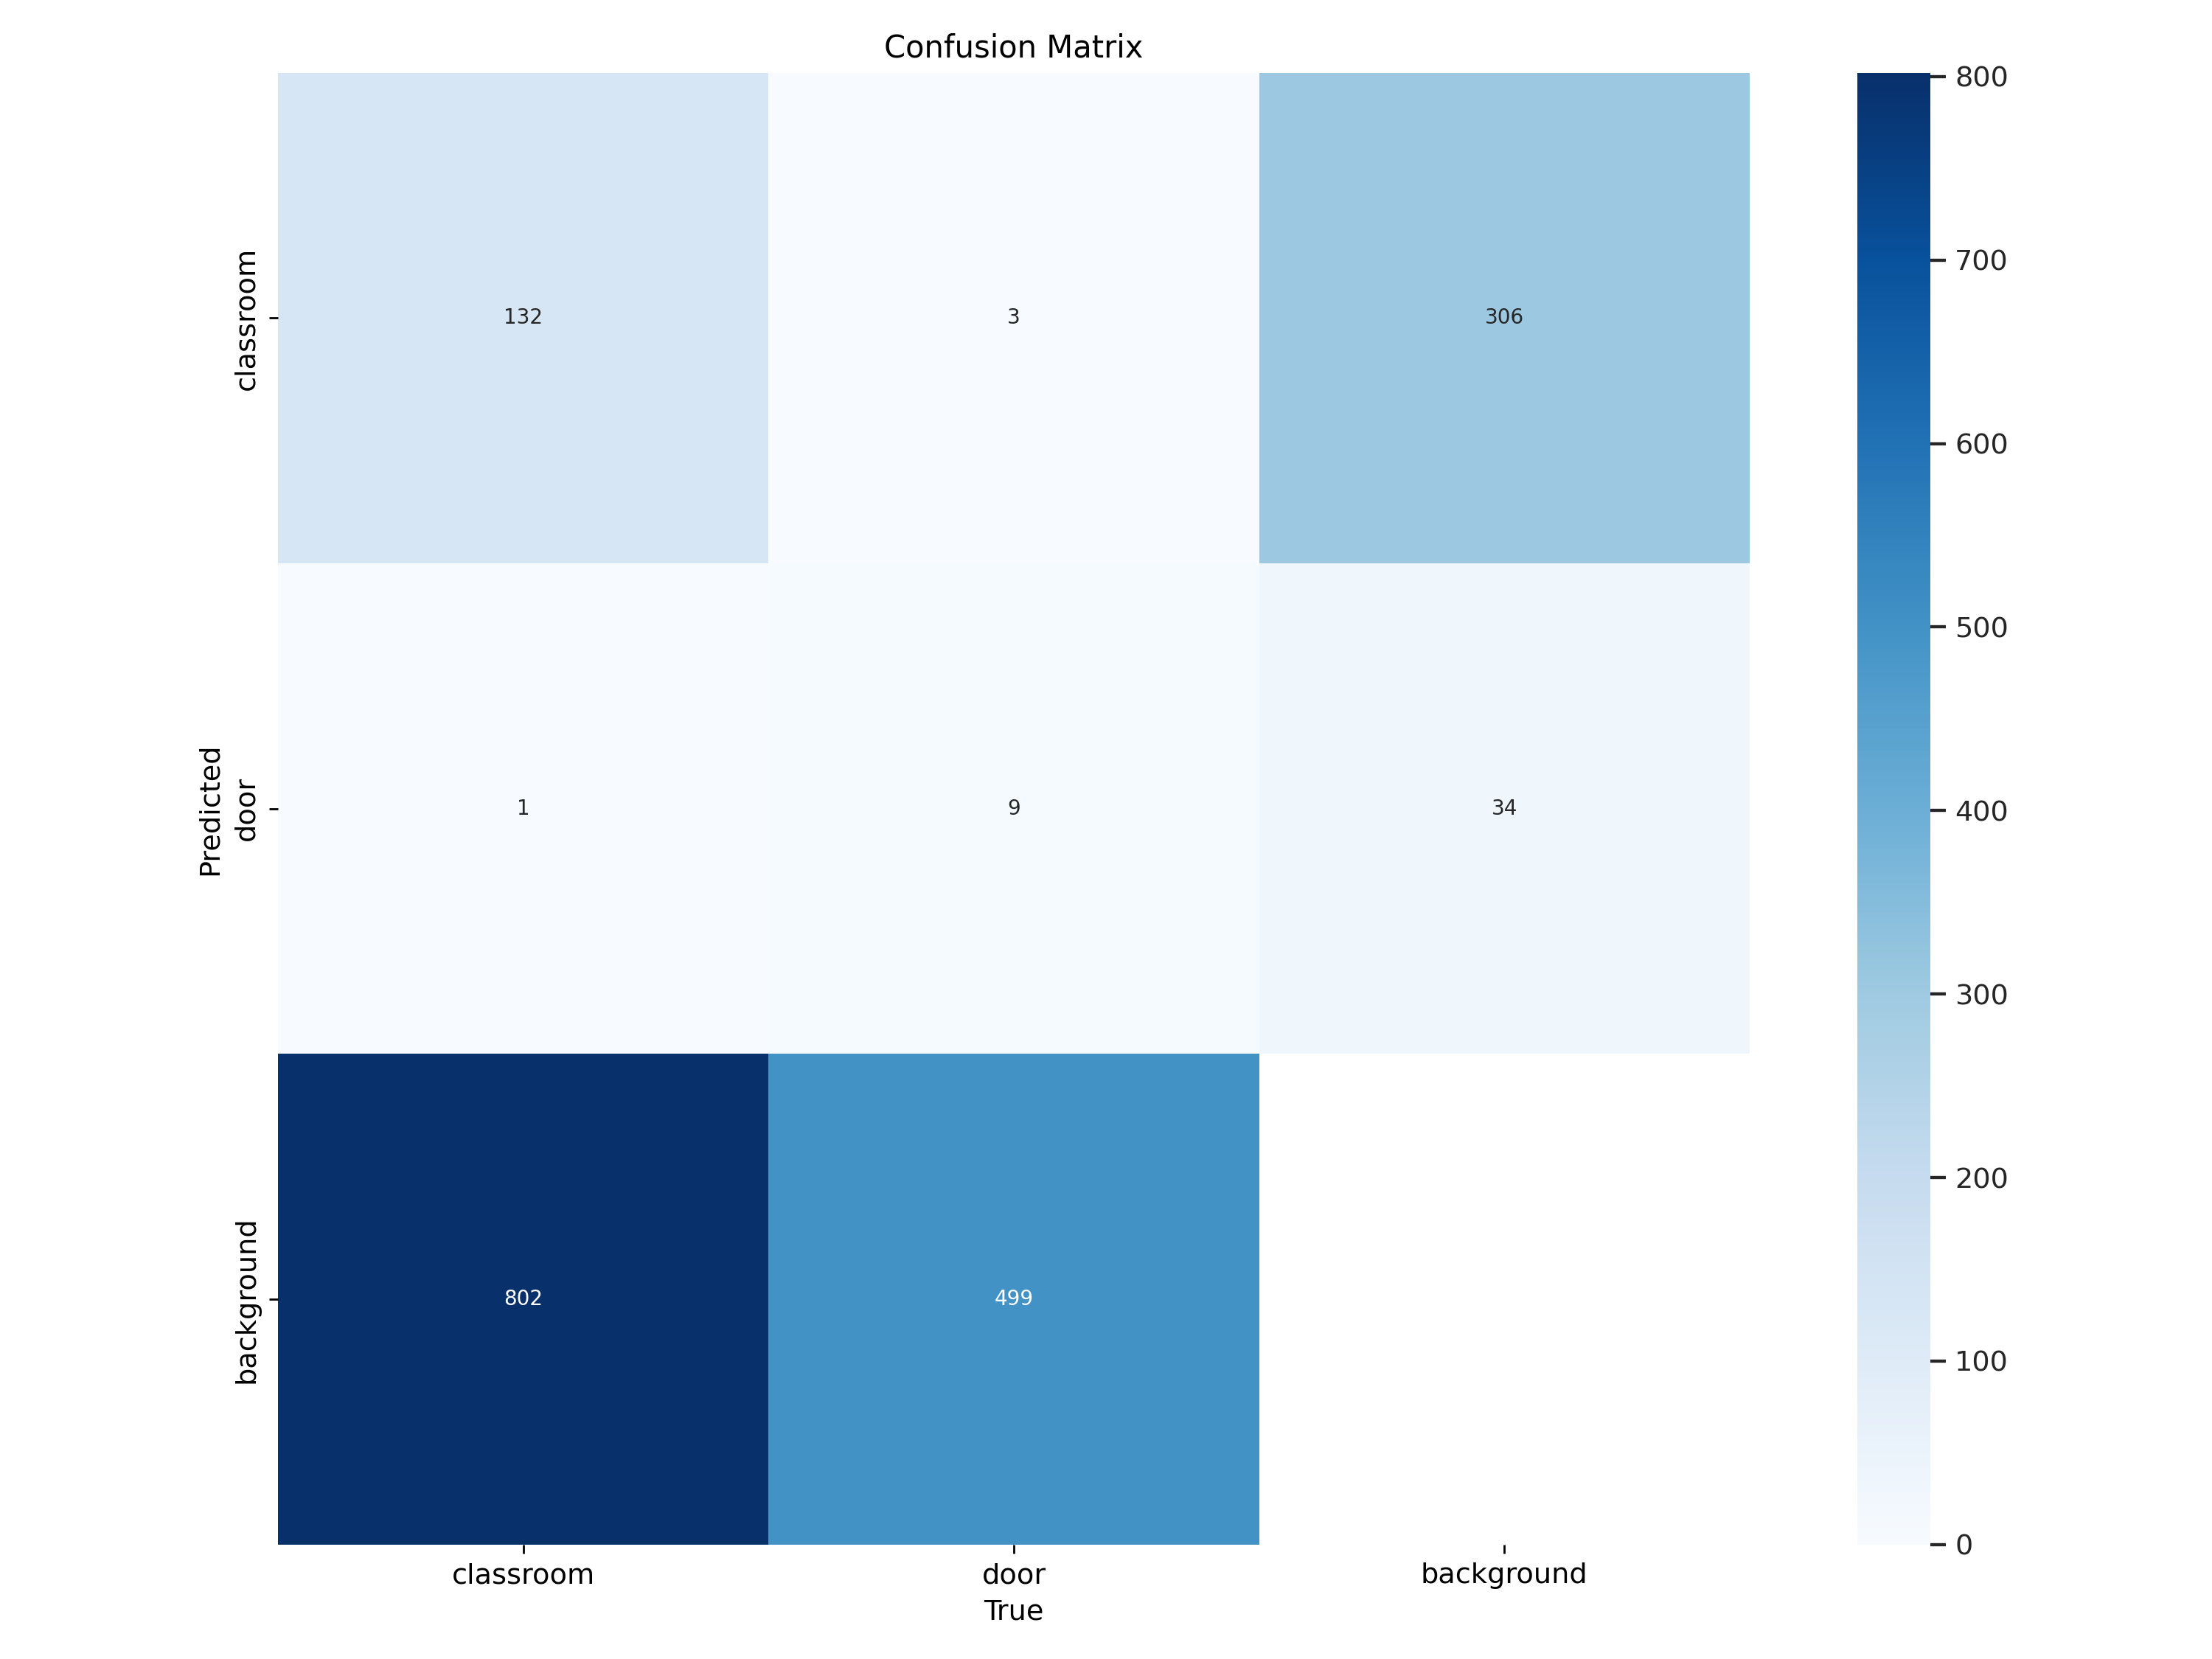

In [41]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

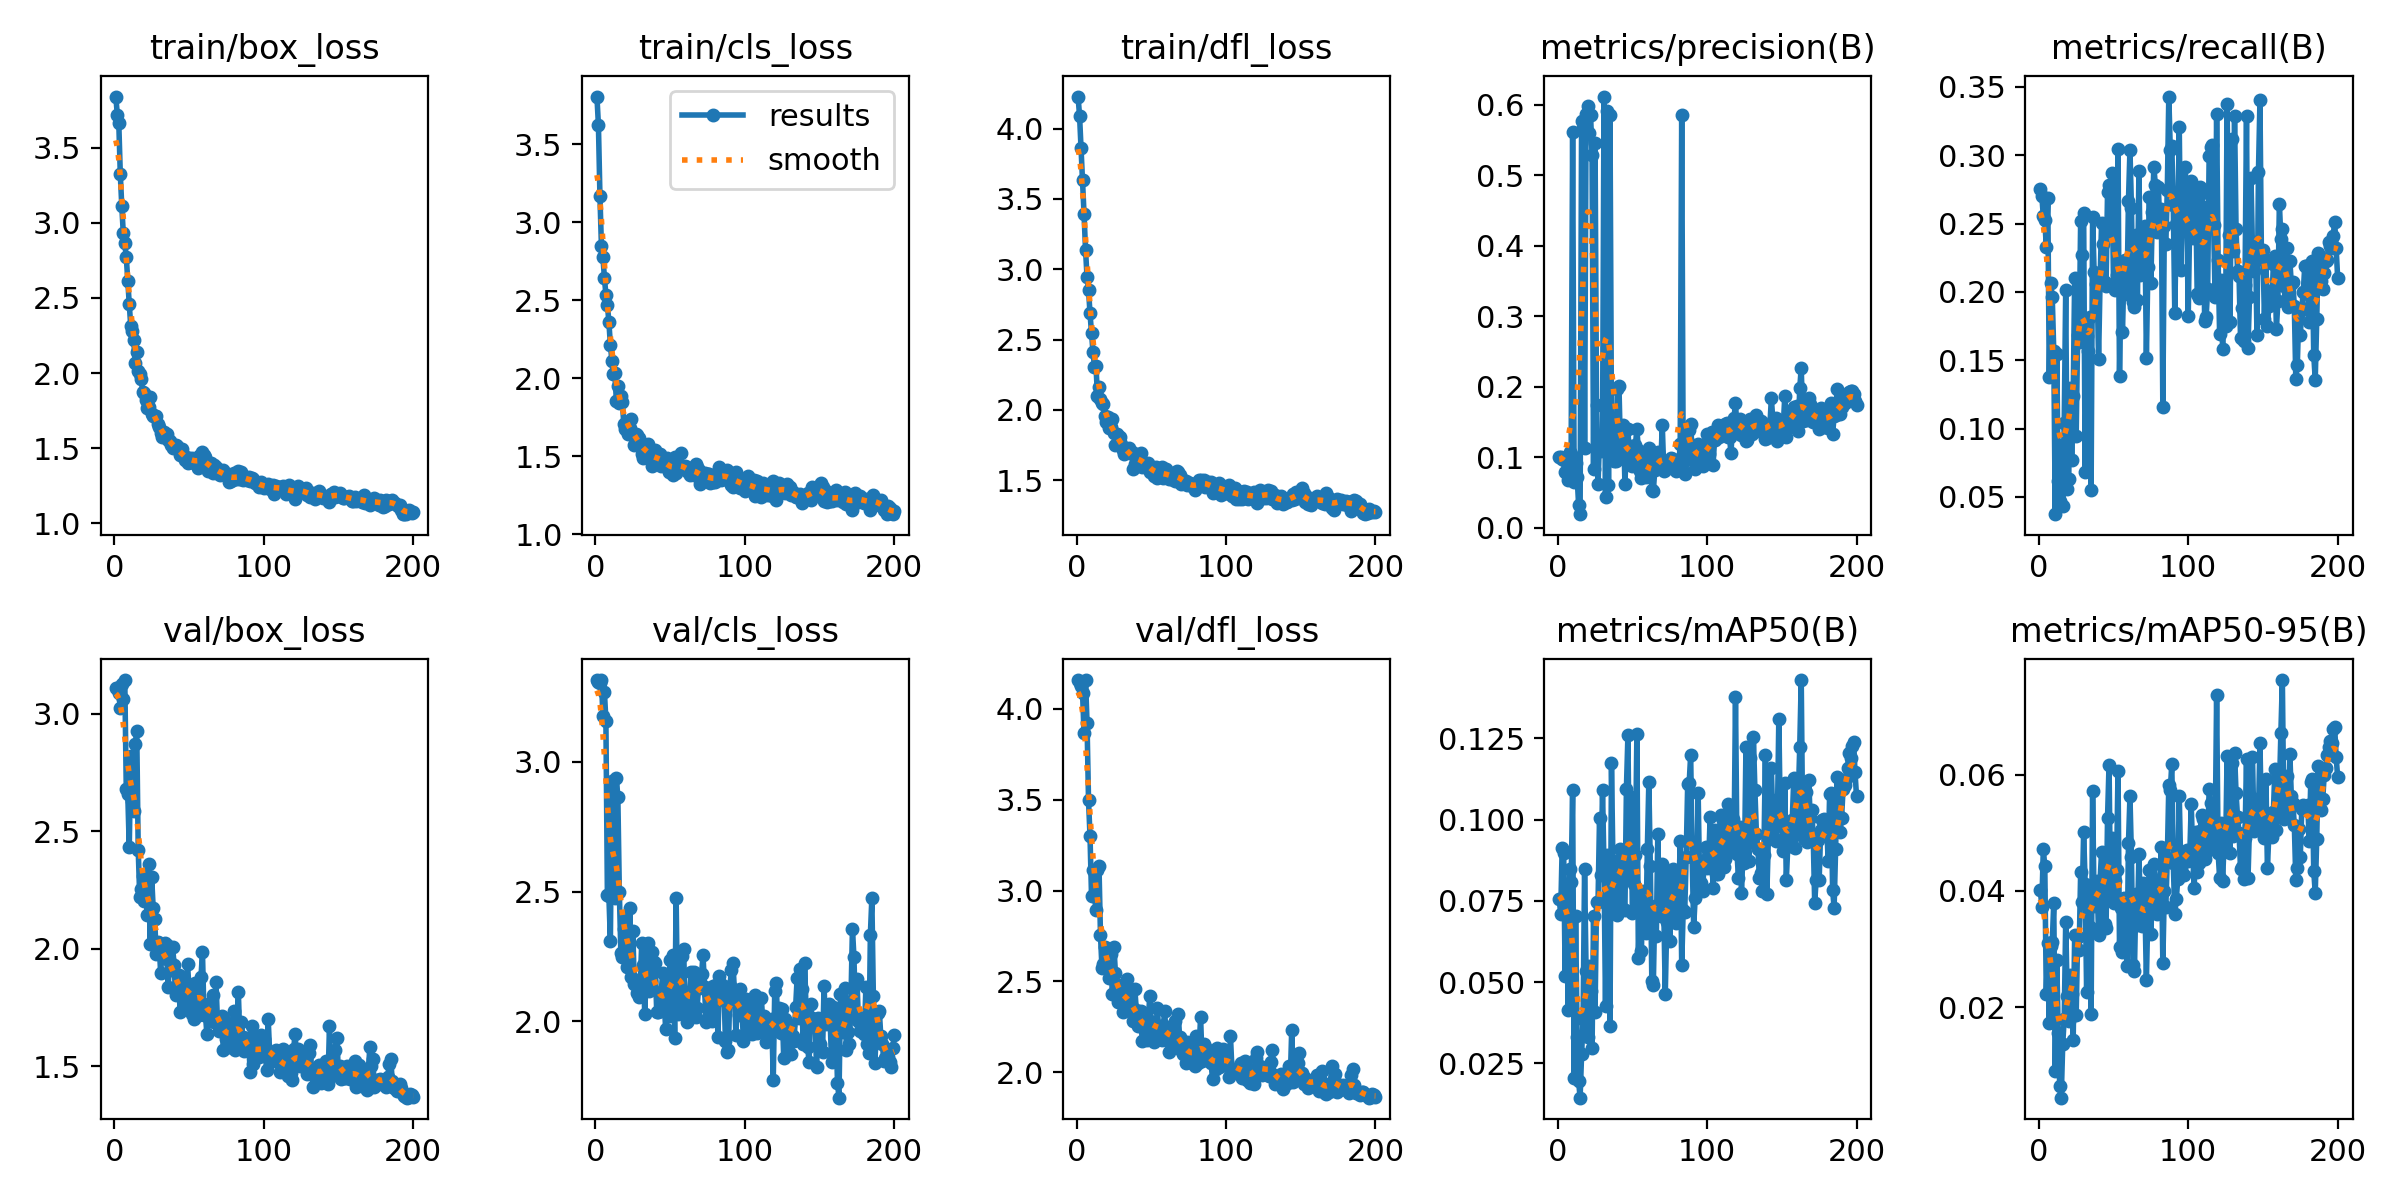

In [42]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

In [43]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

ds.classes

['classroom', 'door']

In [44]:
from supervision.metrics import MeanAveragePrecision

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

In [45]:
print("mAP 50:95", map.map50_95)
print("mAP 50", map.map50)
print("mAP 75", map.map75)

mAP 50:95 0.03365661711251255
mAP 50 0.048597576575819965
mAP 75 0.04258285831222973


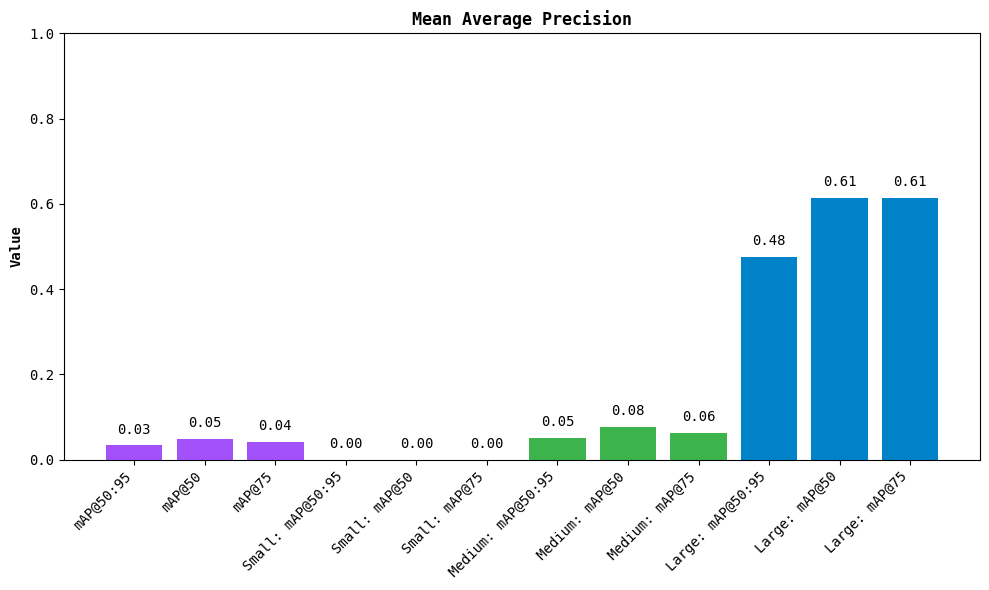

In [46]:
map.plot()

In [47]:
import supervision as sv

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

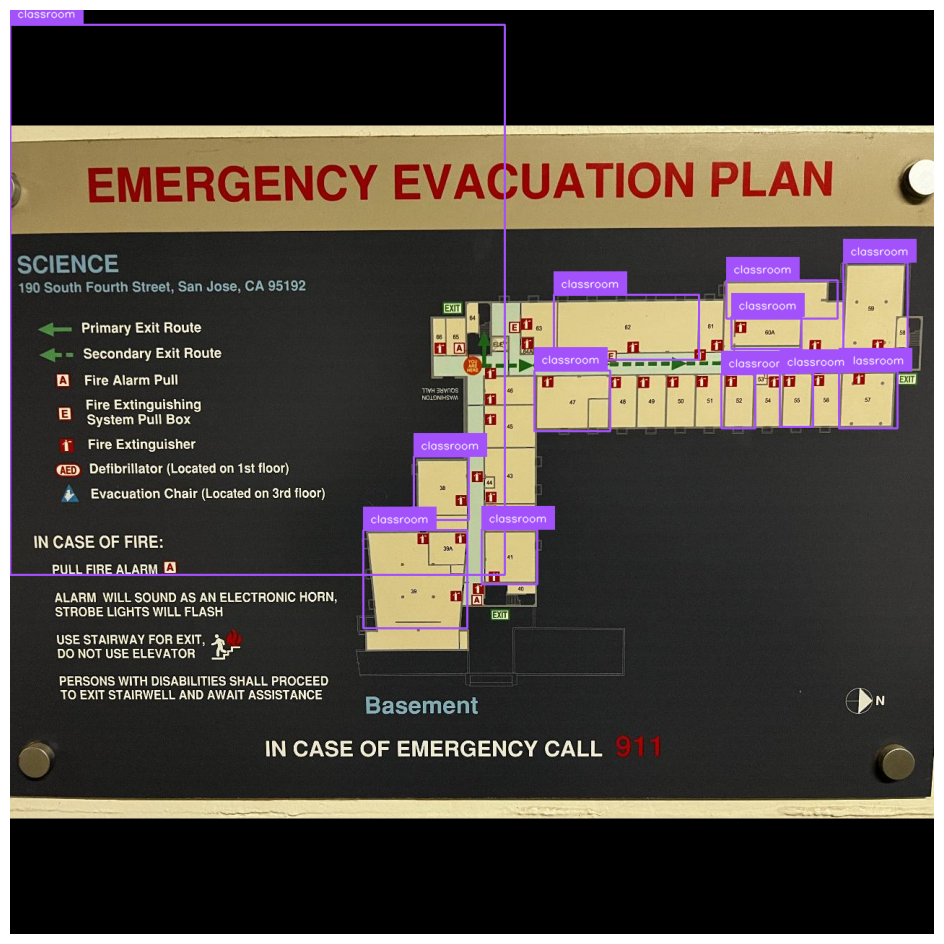

In [60]:
import random

i = random.randint(0, len(ds))

image_path, image, target = ds[i]

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)